# **Redes Neurais com Pytorch**
---
> *André Luiz França Batista*

---

> **Roteiro**
* Problema de classificação da flor Iris

---


# Importar as bibliotecas


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Classe Net do Pytorch
> Criação de um modelo de Rede Neural
![picture](https://drive.google.com/uc?export=view&id=1uDRhXxnzGk8QoZHX1oqhmHPuMzxJHQZp)

In [ ]:
# Criar um modelo de Rede Neural
class Net(torch.nn.Module):
  def __init__(self, input_size, hidden_size):
    super(Net, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size) #full connected
    self.relu = torch.nn.ReLU() #(0, infinito)
    self.fc2 = torch.nn.Linear(self.hidden_size, 1)
    self.sigmoid = torch.nn.Sigmoid() #(0, 1)
  def forward(self, x):
    hidden = self.fc1(x)
    relu = self.relu(hidden)
    output = self.fc2(relu)
    output = self.sigmoid(output)
    return output

# Base de dados
* sklearn
* dataset íris

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
# data, target, target_names
print(iris)
dados = iris.data
classes = iris.target
nomesClasses = iris.target_names

# **Preparação dos dados**
* Organizar a saída do dataset de três para duas classes
* Converter dados para tensor
* Embaralhar os dados
* Separar os dados em treinamento e teste



# Organizar a saída do dataset
* Numpy
* Função *where*
* Transformar três classes em apenas duas.

In [ ]:
# Converter as classes
print(classes)
print(nomesClasses)
# saida = np.where(condição, true, false)
# saida = np.where(classes==2, 1, 0) # virginica
saida = np.where(classes==2, 0, classes) #versicolor
print(saida)
# 0: setosa; 1: versicolor; 2: virginica;
# 0: setosa; 0: versicolor; 1: virginica;

# Converter para tensor
* Formato de dados que o Pytorch trabalha no modelo de Redes Neurais
* Normalizar dados entre 0 e 1

In [ ]:
# Converter para tensor
entrada = torch.FloatTensor(dados) / 10
saida = torch.FloatTensor(saida)
# print(entrada)
# print(torch.max(entrada))
# print(saida)

# Embaralhar os dados
* Facilita o treinamento
* Facilita a separação entre dados de treinamento e teste

In [ ]:
from sklearn.utils import shuffle
print(saida)
entrada, saida = shuffle(entrada, saida)
print(saida)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.])
tensor([1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
        1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       

# Separar os dados em treinamento e teste
* Geralmente 80% para treinamento 20% para teste

In [ ]:
# Separar os dados em treinamento e testes
entrada_treinamento = entrada[0:130, :]
saida_treinamento = saida[0:130]
entrada_testes = entrada[130:150, :]
saida_testes = saida[130:150]
print(entrada_testes)
print(saida_testes)

tensor([[0.6200, 0.2800, 0.4800, 0.1800],
        [0.4800, 0.3000, 0.1400, 0.0100],
        [0.7200, 0.3000, 0.5800, 0.1600],
        [0.5100, 0.3400, 0.1500, 0.0200],
        [0.6300, 0.2900, 0.5600, 0.1800],
        [0.4900, 0.2500, 0.4500, 0.1700],
        [0.5000, 0.3400, 0.1500, 0.0200],
        [0.4400, 0.2900, 0.1400, 0.0200],
        [0.6200, 0.3400, 0.5400, 0.2300],
        [0.5100, 0.3700, 0.1500, 0.0400],
        [0.5000, 0.2300, 0.3300, 0.1000],
        [0.4900, 0.2400, 0.3300, 0.1000],
        [0.6100, 0.2600, 0.5600, 0.1400],
        [0.7700, 0.3000, 0.6100, 0.2300],
        [0.6000, 0.2900, 0.4500, 0.1500],
        [0.6100, 0.2900, 0.4700, 0.1400],
        [0.6100, 0.2800, 0.4000, 0.1300],
        [0.5000, 0.3000, 0.1600, 0.0200],
        [0.4600, 0.3100, 0.1500, 0.0200],
        [0.6900, 0.3100, 0.4900, 0.1500]])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
        0., 1.])


# **Montar o modelo de Redes Neurais**

---

> Modelo
* Classe Net(input_size, hidden_size)
* input_size: quantidade de características de cada instância do dataset
* hidden_size: a critério do programador. Um bom começo seria: **((input_size + 1) / 2)**

---

> Configurações do modelo
* Critérios de cálculo do erro a cada época de treinamento
* Optimizador SGD (Stochastic Gradient Descent): Faz a atualização dos pesos da rede.

---


In [ ]:
# Montar o modelo para o treinamento
# print(entrada_treinamento.size())
input_size = entrada_treinamento.size()[1]
hidden_size = 18
modelo = Net(input_size, hidden_size)
print(modelo)

# Configurações do modelo
criterion = torch.nn.MSELoss() # Mean Square Error
optimizer = torch.optim.SGD(modelo.parameters(), lr = 0.15, momentum = 0.99)

Net(
  (fc1): Linear(in_features=4, out_features=18, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=18, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


# Treinamento do Modelo
> Critérios de parada do treinamento
* Quantidade de épocas de treinamento
* Erro mínimo alcançado

In [ ]:
#Treinar o modelo
modelo.train()
epochs = 10001 # Quantidade de épocas de treinamento

errors = [] # Criando um array vazio para guardar os erros de cada epoca

for epoch in range(epochs):
  optimizer.zero_grad()
  # Forward pass
  y_pred = modelo(entrada_treinamento)
  # Compute Loss
  loss = criterion(y_pred.squeeze(), saida_treinamento)
  errors.append(loss.item())
  if epoch % 1000 == 0:
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
  # Backward pass
  loss.backward()
  optimizer.step()

Epoch 0: train loss: 0.23070763051509857
Epoch 1000: train loss: 0.011132377199828625
Epoch 2000: train loss: 0.009780130349099636
Epoch 3000: train loss: 0.008969413116574287
Epoch 4000: train loss: 0.008524777367711067
Epoch 5000: train loss: 0.008273729123175144
Epoch 6000: train loss: 0.008120479993522167
Epoch 7000: train loss: 0.008022618480026722
Epoch 8000: train loss: 0.007955646142363548
Epoch 9000: train loss: 0.007908029481768608
Epoch 10000: train loss: 0.00787333119660616


# Testar a rede
* Testar a rede com os dados de testes
* Dados que a rede não conhece
* Visualizar o resultado

In [ ]:
# Rodar a rede com os dados de teste, os dados que a rede nunca viu
modelo.eval()
torch.set_printoptions(sci_mode=False)
y_pred = modelo(entrada_testes)
print(y_pred.squeeze()) # valor previsto pela rede
print(saida_testes) # valor real

tensor([    0.1605,     0.0000,     0.0000,     0.0000,     0.0000,     0.0001,
            0.0000,     0.0000,     0.0000,     0.0000,     0.9999,     0.9988,
            0.0000,     0.0000,     1.0000,     1.0000,     1.0000,     0.0001,
            0.0000,     1.0000], grad_fn=<SqueezeBackward0>)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
        0., 1.])


In [ ]:
for param in modelo.parameters():
  print(param)

Parameter containing:
tensor([[    -0.2432,      0.4809,      0.2130,     -0.2099],
        [    -0.1578,      0.2213,      0.0804,      0.0693],
        [    -0.2253,     -0.4909,      0.0923,     -0.1443],
        [     0.3043,     -0.2573,     -0.1834,     -0.1964],
        [    -0.0336,     -0.2663,     -0.4646,     -0.3171],
        [    -0.3191,      1.8898,     -6.1491,     -1.8875],
        [     6.5025,     -9.3093,     -6.9786,     -6.5069],
        [    -0.3394,      1.7921,     -4.1845,     -1.7954],
        [    -1.5723,     -5.6899,      8.9935,      6.9755],
        [    -0.5361,      3.0791,     -7.6910,     -2.5380],
        [    -0.0098,      0.0204,     -0.0783,     -0.4897],
        [     0.2299,     -0.3258,     -0.3789,     -0.0186],
        [    -2.7008,     -9.6825,     13.7484,     10.5344],
        [     1.5148,      2.5419,     -4.0051,     -3.3148],
        [    -0.9234,      0.9196,     -1.1270,      0.3412],
        [    -0.1252,      0.1729,      0.3476, 

# Gráficos
* Gráfico de erro
* Gráfico do resultado da classificação

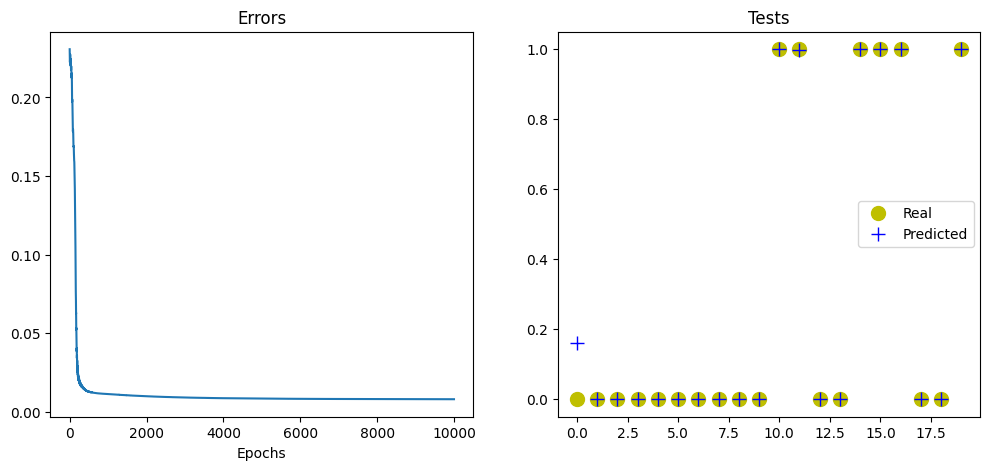

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plotcharts(errors):
    errors = np.array(errors)
    plt.figure(figsize=(12, 5))
    graf02 = plt.subplot(1, 2, 1) # nrows, ncols, index
    graf02.set_title('Errors')
    plt.plot(errors, '-')
    plt.xlabel('Epochs')
    graf03 = plt.subplot(1, 2, 2)
    graf03.set_title('Tests')
    a = plt.plot(saida_testes.numpy(), 'yo', label='Real')
    plt.setp(a, markersize=10)
    a = plt.plot(y_pred.detach().numpy(), 'b+', label='Predicted')
    plt.setp(a, markersize=10)
    plt.legend(loc=7)
    plt.show()
plotcharts(errors)